In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.shape
y.shape

(70000,)

In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


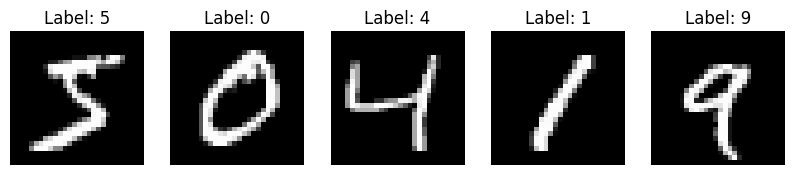

In [21]:
fig, ax = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    ax[i].imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax[i].set_title(f"Label: {y[i]}")
    ax[i].axis('off')
plt.show()

In [6]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(70000, 332)

In [9]:
X_pca

array([[-0.89171985, -4.9297109 , -0.09303758, ...,  0.30195504,
         0.34914432, -0.75236794],
       [ 8.81353003, -7.51756046, -3.71418494, ..., -0.06624713,
        -0.31683963, -0.18031208],
       [ 2.20483541,  9.82446089, -5.75248779, ..., -1.22701746,
        -0.57933675, -0.58560677],
       ...,
       [-5.22259497, -1.18431579, -4.75472539, ..., -0.12880238,
         0.1570488 , -0.15444026],
       [-2.17772858, -6.99503251, -3.2287368 , ...,  0.35058249,
        -0.38437844,  0.31056431],
       [11.77787167, -5.40298122,  2.32272519, ...,  0.11069167,
         0.15354898,  0.11826091]])

In [10]:
pca.n_components_

332

In [11]:
pca.explained_variance_ratio_

array([0.05642719, 0.04041226, 0.03738273, 0.02893   , 0.02520752,
       0.02192549, 0.01914282, 0.01740684, 0.01532232, 0.01396087,
       0.01342175, 0.01201421, 0.01113962, 0.01090582, 0.01027986,
       0.00994955, 0.00931255, 0.00919635, 0.008886  , 0.00863195,
       0.00821741, 0.00798417, 0.00762573, 0.00742315, 0.0071657 ,
       0.00689314, 0.00681399, 0.00654588, 0.00627293, 0.00610345,
       0.00597261, 0.00589304, 0.00567358, 0.00559358, 0.00552473,
       0.00534443, 0.00527593, 0.00515841, 0.00505498, 0.00477438,
       0.00476312, 0.00465155, 0.00453454, 0.00445757, 0.00442313,
       0.00437877, 0.00437294, 0.00427724, 0.00424808, 0.00418524,
       0.00404059, 0.00396258, 0.00393176, 0.00390562, 0.00386444,
       0.00377501, 0.00373883, 0.00368328, 0.00360377, 0.0035637 ,
       0.00349289, 0.00344527, 0.00343239, 0.00341   , 0.00334463,
       0.00332107, 0.00329803, 0.00319433, 0.0031711 , 0.00315431,
       0.00309941, 0.00305782, 0.00305095, 0.0030396 , 0.00296

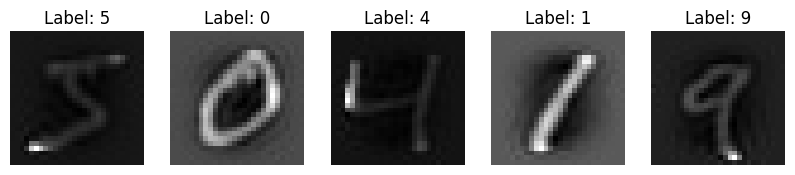

In [12]:
X_reconstructed = pca.inverse_transform(X_pca)

fig, ax = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    ax[i].imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    ax[i].set_title(f"Label: {y.iloc[i]}")
    ax[i].axis('off')
plt.show()

In [17]:
#Custom PCA function
n_components = 332

# Compute SVD
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)

selected_components = Vt[:n_components, :]

X_pca_custom = np.dot(X_scaled, selected_components.T)

In [18]:
X_pca_custom.shape

(70000, 332)

In [19]:
X_pca_custom


array([[  0.89171985,  -4.9297109 ,   0.09303758, ...,   0.30195504,
          0.34914432,   0.75236794],
       [ -8.81353003,  -7.51756046,   3.71418494, ...,  -0.06624713,
         -0.31683963,   0.18031208],
       [ -2.20483541,   9.82446089,   5.75248779, ...,  -1.22701746,
         -0.57933675,   0.58560677],
       ...,
       [  5.22259497,  -1.18431579,   4.75472539, ...,  -0.12880238,
          0.1570488 ,   0.15444026],
       [  2.17772858,  -6.99503251,   3.2287368 , ...,   0.35058249,
         -0.38437844,  -0.31056431],
       [-11.77787167,  -5.40298122,  -2.32272519, ...,   0.11069167,
          0.15354898,  -0.11826091]])